In [1]:
from google.colab import drive

In [2]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
import numpy as np
import pandas as pd
import cv2
import os

In [4]:
drive.mount('/content/drive')#connect drive to colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Datadir='/content/drive/MyDrive/datasets/petimg'
category=["Dog","Cat"]
dataset=[]
size=50
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='Dog':
            ex=1
        else :
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

In [6]:
import random

In [7]:
random.shuffle(dataset)

In [8]:
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

In [9]:
X=np.array(X).reshape(-1,50,50,1)

In [10]:
model=Sequential()
model.add(Flatten(input_shape=(50,50)))
model.add(Dense(2500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.add(Dense(2,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 2500)              6252500   
                                                                 
 dense_1 (Dense)             (None, 10)                25010     
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,277,532
Trainable params: 6,277,532
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
Yt=np.array(Y)
from collections import Counter

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Yt, test_size = 0.2)
history=model.fit(X_train,y_train,epochs=250,validation_split=0.2)

Epoch 1/250
21/21 [==============================] - 2s 74ms/step - loss: 0.6968 - accuracy: 0.4841 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 2/250
21/21 [==============================] - 1s 48ms/step - loss: 0.6952 - accuracy: 0.4841 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/250
21/21 [==============================] - 1s 31ms/step - loss: 0.6945 - accuracy: 0.4841 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/250
21/21 [==============================] - 1s 31ms/step - loss: 0.6936 - accuracy: 0.4841 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 5/250
21/21 [==============================] - 1s 31ms/step - loss: 0.6934 - accuracy: 0.4734 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 6/250
21/21 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.5159 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/250
21/21 [==============================] - 1s 31ms/step - loss: 0.6929 - accuracy: 0.5159 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 

In [14]:
y_prob=model.predict(X_test)

In [15]:
y_pred=y_prob.argmax(axis=1)

In [16]:
import matplotlib.pyplot as plt

In [17]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5265700483091788

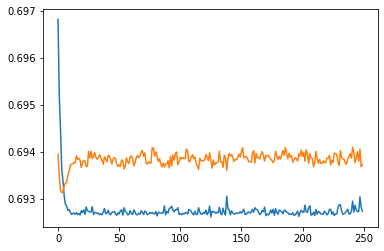

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

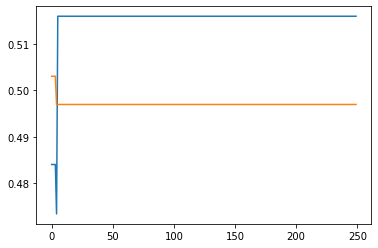

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])